# TP1 Prétraitement acoustique et Analyse en Composantes Principales

NOM - PRÉNOM : Gonzalez Jean-Loup

Déposer le notebook sur moodle à la fin de la séance. 

In [1]:
import numpy as np
import scipy.io.wavfile as wav
from canaux24 import canaux
from scipy import linalg
import matplotlib.pyplot as plt
import os

### Prétraitements élémentaires
Définition de la fonction lecture qui permet de récupérer la matrice des observations.

 ### Traitements : 
 ATTENTION 
 Procéder par étape en écrivant le code dans une cellule et en traçant le résultat dans la cellule suivante 
 Affichage des matices, des vecteurs, de leur taille ceci afin de vérifier la cohérence des résultats. 
 

In [2]:
nomSignaux=[]
for nomFichier in os.listdir('Signal'):
    #Remplissage d'une liste avec le noms des fichiers
    nomSignaux.append(nomFichier)
nomSignaux.sort()
#récupération de la fe d'un échantillon (le 6, par exemple)
(f_ech,echantillon)=wav.read('Signal/'+nomSignaux[5])
print("frequence d'echantillonage : " +str(f_ech))
# Définition de la fonction lecture 
def lecture(voyelle,nbIndividus):
    obs=[]
    cmpt=0
    for nomSignal in nomSignaux:
        if(nomSignal[0:2]==voyelle and cmpt <nbIndividus):
            signal=wav.read('Signal/'+nomSignal)
            mel= canaux(signal[1],f_ech)
            obs.append(mel)   
            cmpt=cmpt+1
    return obs



frequence d'echantillonage : 16000


In [3]:
# Lecture des 20 fichiers pour chacune des classes
# les observations recuperees sont reduites à 24D grâce à MEL qui
# calcule les MFCC (grace à des FFT)
obsaa = lecture('aa', 20)
obsuu = lecture('uu', 20)
obsii = lecture('ii', 20)

In [4]:
# Créer une matrice contenant l'ensemble des observations à traiter
# la matrice R est de dim 24
R = np.vstack((obsaa, obsuu, obsii))
Rt=R.transpose()
print(np.shape(Rt))

(24, 60)


In [15]:
# En utilisant les fonctions cov et eig, constituer une matrice de passage qui permette de passer 
# de l'espace de dimension 24 généré par la fonction canaux dans un espace à deux dimensions 
# correspondant aux deux composantes principales.
# on calcule les vacteurs propres de R (24D)
# on ne garde que les 2 plus fortes val propres, c'est a dire les 
# 2D qui sont les plus caractéristiques (moins de perte d'information lors
# de la réduction de dimension)
# permet de rendre la matrice R carrée (pour utiliser linalg)
matriceCov=np.cov(Rt)
# calcul les val propres et les vect propres de la matrice de cov de R
(valPropres,vectPropres)=linalg.eig(matriceCov)

In [6]:
# Pour cela, 
# 1 - rechercher les deux valeurs propres maximales 
vp1=np.max(valPropres)
indexVp1=np.where(valPropres==vp1)
inter=np.delete(valPropres,indexVp1)
vp2=np.max(inter)
indexVp2=np.where(valPropres==vp2)
print("Les deux valeurs propres maximales sont : "+str(vp1)+str(vp2))
print("index des 2 vect propres max : "+str(indexVp1)+str(indexVp2))

Les deux valeurs propres maximales sont : (5295554841433.579+0j)(465469342942.3679+0j)
index des 2 vect propres max : (array([0], dtype=int64),)(array([1], dtype=int64),)


In [7]:
# 2-  prendre les vecteurs propres correspondants
vectPropre1=vectPropres[indexVp1]
vectPropre2=vectPropres[indexVp2]
print(vectPropre1)
print(vectPropre2)

[[-4.58258772e-03 -5.87687541e-04  1.03534506e-02  1.64002609e-02
  -1.33960772e-02  1.29936691e-02  1.37387425e-03 -5.05408368e-03
  -1.06158527e-02  7.72427670e-03 -2.70668054e-02  8.57658002e-02
  -7.82236117e-03  6.97944891e-02  1.01853962e-01 -2.09432233e-01
  -2.74490800e-02 -4.52085487e-02 -1.43116279e-01 -5.68069344e-01
  -6.06515752e-01  1.28609136e-01 -4.45212501e-01  5.65625568e-02]]
[[-0.15578644 -0.21506731  0.19539834  0.49489156 -0.05216259  0.28534929
   0.46432554  0.12817984 -0.09912921  0.20367236  0.08420736  0.43766271
   0.01351832 -0.02663672  0.08308415  0.18210604 -0.1836531  -0.03191638
   0.01613803 -0.02084179  0.05443926  0.01740962  0.01752801  0.01681489]]


In [8]:
# 3-  projeter R dans ce nouvel espace 
# on garde les 2 premieres colonnes de la matrice vectPropres, 
# qui correspondent aux 2 vect propres aux val prores max
matrix_vectPropres_max=vectPropres[:,:2]
print(np.shape(matrix_vectPropres_max))
print(type(matrix_vectPropres_max))
# on multiplie matrix_vectPropres_max et R pour projeter R dans un espace 2D
R_projetee=np.dot(R,matrix_vectPropres_max)
print(np.shape(R_projetee))
#print(R_projetee)

(24, 2)
<class 'numpy.ndarray'>
(60, 2)


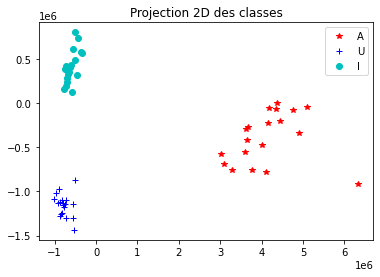

In [9]:
# 4- et effectuer un tracé
# Afficher les nuages de points de chacune des classes de sons sur une même figure en les différenciant 
# par des couleurs ou une forme de tracé de points différentes ; Mettre une légende.
R_projetee_A=np.dot(R[:19],matrix_vectPropres_max)
R_projetee_U=np.dot(R[20:39],matrix_vectPropres_max)
R_projetee_I=np.dot(R[40:59],matrix_vectPropres_max)
plt.plot(R_projetee_A[:,0],R_projetee_A[:,1],'r*',label="A")
plt.plot(R_projetee_U[:,0],R_projetee_U[:,1],'b+',label="U")
plt.plot(R_projetee_I[:,0],R_projetee_I[:,1],'co',label="I")
plt.title("Projection 2D des classes")
plt.legend()


In [10]:
# 5- rechercher les deux valeurs propres minimales

#recherche des vect propres ayant les val propres associees les plus faibles : 
#valeurs propres
vpMin1=np.min(valPropres)
index_vp_min1=np.where(valPropres==vpMin1)
inter_min=np.delete(valPropres,index_vp_min1)
vpMin2=np.min(inter_min)
index_vp_min2=np.where(valPropres==vpMin2)
print("Les deux valeurs propres minimales sont : "+str(vpMin1)+str(vpMin2)+"\n")
#vecteurs propres associes
vectPropreMin1=vectPropres[index_vp_min1]
vectPropreMin2=vectPropres[index_vp_min2]
print("index des 2 vect propres min : "+str(index_vp_min1)+str(index_vp_min2))


Les deux valeurs propres minimales sont : (52481008.412379004+0j)(170313347.60951015+0j)

index des 2 vect propres min : (array([18], dtype=int64),)(array([23], dtype=int64),)


(24, 2)
(60, 2)


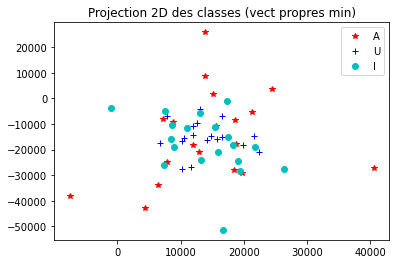

In [11]:
# Utilisez les deux vecteurs propres les moins représentatifs pour la matrice de passage, 

# projeter R dans ce nouvel espace 
matrix_vectPropres_min=[[row[18] for row in vectPropres],[row[23] for row in vectPropres]]
matrix_vectPropres_min=np.array(matrix_vectPropres_min).transpose()
print(np.shape(matrix_vectPropres_min))
# on multiplie matrix_vectPropres_min et R pour projeter R dans un espace 2D
R_projetee_min=np.dot(R,matrix_vectPropres_max)
print(np.shape(R_projetee_min))
#print(R_projetee)
R_projetee_min_A=np.dot(R[:19],matrix_vectPropres_min)
R_projetee_min_U=np.dot(R[20:39],matrix_vectPropres_min)
R_projetee_min_I=np.dot(R[40:59],matrix_vectPropres_min)
plt.plot(R_projetee_min_A[:,0],R_projetee_min_A[:,1],'r*',label="A")
plt.plot(R_projetee_min_U[:,0],R_projetee_min_U[:,1],'b+',label="U")
plt.plot(R_projetee_min_I[:,0],R_projetee_min_I[:,1],'co',label="I")
plt.title("Projection 2D des classes (vect propres min)")
plt.legend()

# que devient la représentation des nuages ? Est-ce qu'une discrimination linéaire est possible ?
# Le nuage de point présente les classes complètement mélangées. On voit bien qu'une 
# discrimination linéaire est impossible.

### Généralisation
Réaliser le même traitement avec tous les fichiers (100) des 3 classes. Est-ce toujours séparable ?
Effectuer le même traitement sur les 10 voyelles et commenter les résultats... Ajouter les cellules nécessaires. 

Les deux valeurs propres maximales sont : (2583468006975.9995+0j)(396110240914.62573+0j)
index des 2 vect propres max : (array([0], dtype=int64),)(array([1], dtype=int64),)


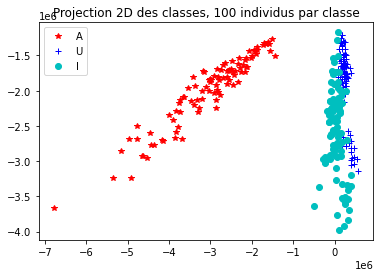

In [14]:
#lecture de tous les fichiers
obsaacomplet = lecture('aa', 100)
obsuucomplet = lecture('uu', 100)
obsiicomplet = lecture('ii', 100)

# Créer une matrice contenant l'ensemble des observations à traiter
# la matrice R est de dim 24
Rcomplet = np.vstack((obsaacomplet, obsuucomplet, obsiicomplet))
RcompletT=Rcomplet.transpose()

matriceCovComplet=np.cov(RcompletT)
# calcul les val propres et les vect propres de la matrice de cov de R
(valPropresComplet,vectPropresComplet)=linalg.eig(matriceCovComplet)

#rechercher les deux valeurs propres maximales 
vp1Complet=np.max(valPropresComplet)
indexVp1Complet=np.where(valPropresComplet==vp1Complet)
interComplet=np.delete(valPropresComplet,indexVp1Complet)
vp2Complet=np.max(interComplet)
indexVp2Complet=np.where(valPropresComplet==vp2Complet)
print("Les deux valeurs propres maximales sont : "+str(vp1Complet)+str(vp2Complet))
print("index des 2 vect propres max : "+str(indexVp1Complet)+str(indexVp2Complet))

#vecteurs propres associes
vectPropre1Complet=vectPropresComplet[indexVp1Complet]
vectPropre2Complet=vectPropresComplet[indexVp2Complet]

# projection de R dans ce nouvel espace 
matrix_vectPropres_Complet=vectPropresComplet[:,:2]
# on multiplie matrix_vectPropres_max et R pour projeter R dans un espace 2D
R_projeteeComplet=np.dot(Rcomplet,matrix_vectPropres_Complet)

#affichage
R_projeteeComplet_A=np.dot(Rcomplet[:99],matrix_vectPropres_Complet)
R_projeteeComplet_U=np.dot(Rcomplet[100:199],matrix_vectPropres_Complet)
R_projeteeComplet_I=np.dot(Rcomplet[200:299],matrix_vectPropres_Complet)
plt.plot(R_projeteeComplet_A[:,0],R_projeteeComplet_A[:,1],'r*',label="A")
plt.plot(R_projeteeComplet_U[:,0],R_projeteeComplet_U[:,1],'b+',label="U")
plt.plot(R_projeteeComplet_I[:,0],R_projeteeComplet_I[:,1],'co',label="I")
plt.title("Projection 2D des classes, 100 individus par classe")
plt.legend()